<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/WalidacjaKrzy%C5%BCowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Walidacja krzyżowa
Walidacja krzyżowa polega na podziale naszego zbioru trenigowego na 'k' mniejszych części, następnie model jest trenowany na 'k-1' częściach oraz oszacowany na tej pozostałej części. Metryki uzyskane z tak otrzymanych modeli są uśrednione. Stosowanie walidacji krzyżowej daje o wiele bardziej miarodajne oceny naszych modeli.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale = 1.3)


In [4]:
raw_data = make_moons(n_samples = 700, noise = 0.25, random_state=42)


In [5]:
data = raw_data[0]
target = raw_data[1]


In [8]:
print(f'data: {data[:5]}')
print(f'target: {target[:5]}')

data: [[-0.15995017  1.03638621]
 [ 1.13114102 -0.58763612]
 [ 0.16966619  0.09420938]
 [ 0.51772753  0.81518706]
 [-0.68002085  0.15563468]]
target: [0 1 1 0 0]


In [9]:
df = pd.DataFrame(data = np.c_[data, target], columns = ['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


In [11]:
px.scatter(data_frame = df, x = 'x1', y = 'x2', color = 'target', width=700, height=400)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

In [14]:
print(f'X_train shape: {x_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (490, 2)
X_test shape: (210, 2)
y_train shape: (490,)
y_test shape: (210,)


Wizualizacja zbioru trenigowego i testowego

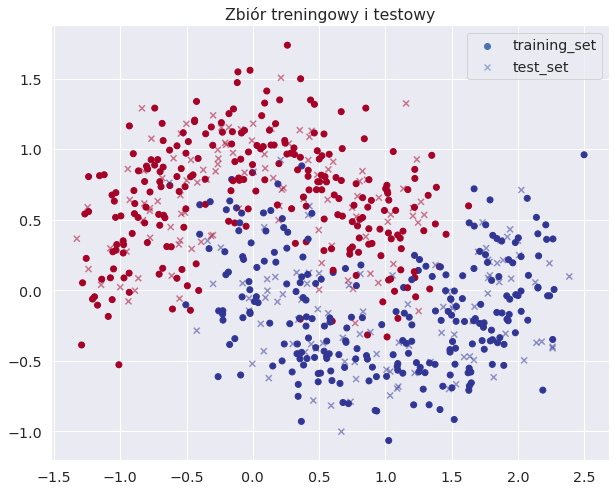

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



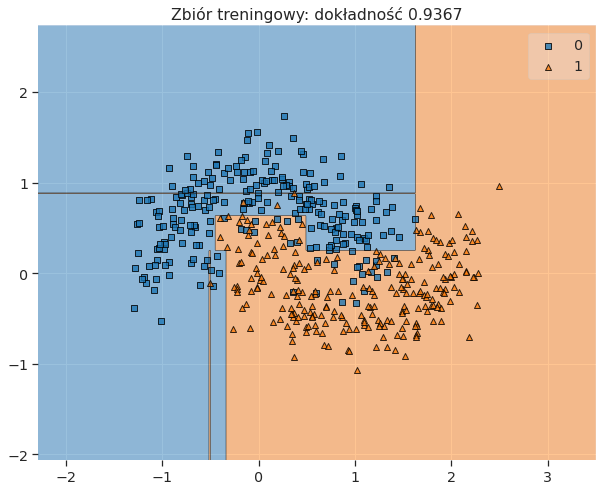

In [18]:

from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(x_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(x_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(x_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



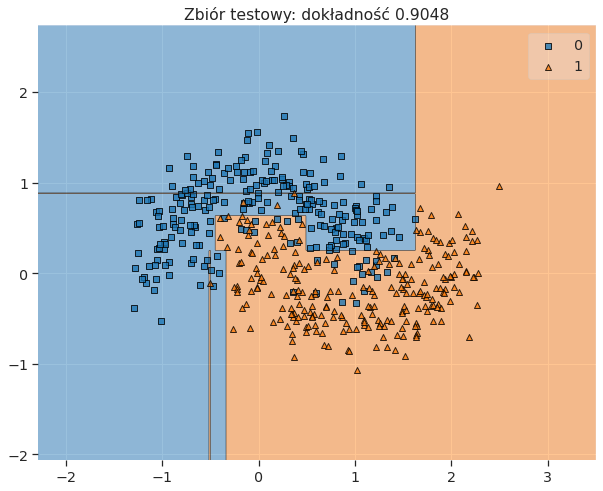

In [20]:
plt.figure(figsize=(10, 8))
plot_decision_regions(x_train, y_train, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(x_test, y_test):.4f}')
plt.show()

Walidacja krzyżowa

In [22]:
from sklearn.model_selection import cross_val_score
classifier = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5)

scores = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

In [27]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9122 (+/- 0.0342)


In [30]:
scores_df = pd.DataFrame({'accuracy':scores})

In [29]:
scores_df

,scores
0,0.877551
1,0.877551
2,0.897959
3,0.897959
4,0.877551
5,0.897959
6,0.959184
7,0.938776
8,0.918367
9,0.979592


In [37]:
px.bar(data_frame=scores_df, y = 'accuracy', color = 'accuracy', height = 400, 
       title = f'Walidacja krzyżowa (15 podziałów) | Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})',
       color_continuous_scale = px.colors.sequential.Inferno_r, range_color = [scores.min() - 0.01, 1.0])